# Simulating Network Deliberation 

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
import numpy as np

### Assign nodes to groups 

In [4]:
from learning import *

In [5]:
from topologies import *

## Clique

No handles with labels found to put in legend.


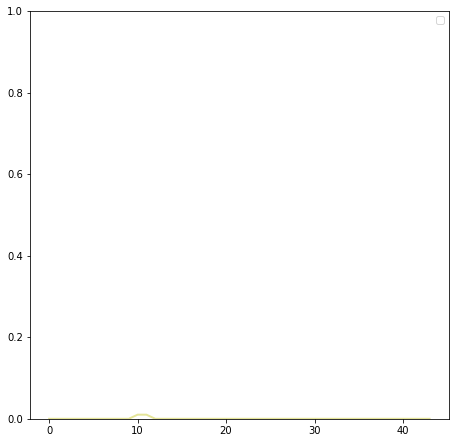

In [13]:
#Uses a clique 

G = nx.complete_graph(100)

G = nx.complete_graph(range(1, 100))
list(G.nodes())
#nx.draw(G)

beliefs_stages = []
#print("To keep beliefs after stages", beliefs_stages)

stages = 3
true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] #ground truth 
steps = 10


for stage in range(stages + 1): 
    if stage == 0: 
        ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", ini_beliefs)
        beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)
        
    else:
        sub_ini_beliefs = beliefs_list[-1]
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
        beliefs_list = learn(G, sub_ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at", stage, "after learn() are", beliefs_stages)
        
#print("beliefs of all stages", beliefs_stages)

plot_beliefs_correct(beliefs_stages, true_value)

## Long path topology

To keep beliefs after stages []


No handles with labels found to put in legend.


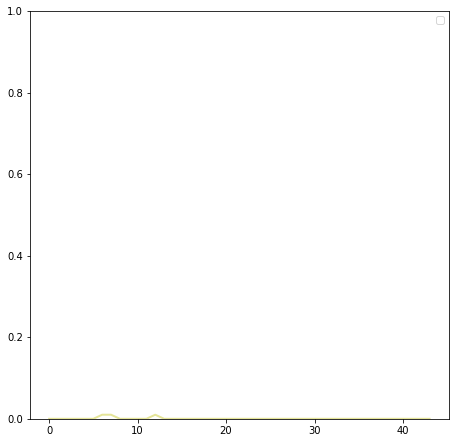

In [14]:
##Uses a long path topology

N = 100 #num of participants(nodes)
M = 9 #group size
stages = 3  #stages
true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] #ground truth 
steps = 10 #number of steps in each learning stratey

    
beliefs_stages = []
print("To keep beliefs after stages", beliefs_stages)


for stage in range(stages + 1):
    groups = get_long_path_stage_groups(N, M, stage)
    #print("all the groups", groups)
    for group in groups:
        #print("group in groups", group) #nodes to form clique network
        g = nx.complete_graph(group) #clique network
        #print("clique network", g.nodes())
        #nx.draw(g)
        #adds cliques to a network 
        G = nx.complete_graph(N)  ##NOT SURE IF THIS ONE IS right//should i use empty_graph instead? 
        G.add_edges_from(g.edges())
        G.add_nodes_from(g.nodes())
    #print("All the edges in graph G are", G.nodes())
    #nx.draw(G)
    if stage == 0: 
        ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", ini_beliefs)
        beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

    else:
        sub_ini_beliefs = beliefs_list[-1]
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
        beliefs_list = learn(G, sub_ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at", stage, "after learn() are", beliefs_stages)
        
#print("beliefs of all stages", beliefs_stages)

plot_beliefs_correct(beliefs_stages, true_value)

## Random Topology

To keep beliefs after stages []


No handles with labels found to put in legend.


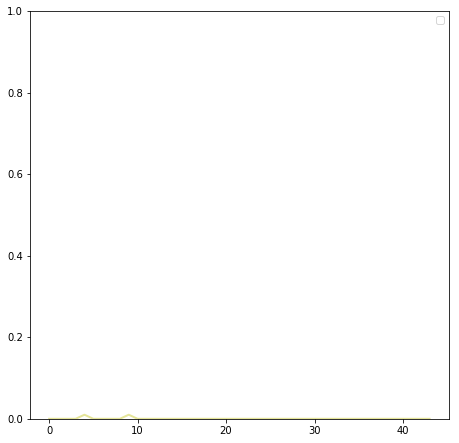

In [15]:
##Uses a random topology

#get_random_stage_groups()

N = 100 #num of participants(nodes)
M = 9 #group size
stages = 3  #stages
true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] #ground truth 
steps = 10 #number of steps in each learning stratey

    
beliefs_stages = []
print("To keep beliefs after stages", beliefs_stages)


for stage in range(stages + 1):
    groups = get_random_stage_groups(N, M, stage)
    #print("all the groups", groups)
    for group in groups:
        #print("group in groups", group) #nodes to form clique network
        g = nx.complete_graph(group) #clique network
        #print("clique network", g.nodes())
        #nx.draw(g)
        #adds cliques to a network 
        G = nx.complete_graph(N)  ##NOT SURE IF THIS ONE IS right//should i use empty_graph instead? 
        G.add_edges_from(g.edges())
        G.add_nodes_from(g.nodes())
    #print("All the edges in graph G are", G.nodes())
    #nx.draw(G)
    if stage == 0: 
        ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", ini_beliefs)
        beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

    else:
        sub_ini_beliefs = beliefs_list[-1]
        #print("Stage #", stage)
        #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
        beliefs_list = learn(G, sub_ini_beliefs, random_neighbor_bit, true_value, steps)
        beliefs_stages += beliefs_list
        #print("Beliefs at", stage, "after learn() are", beliefs_stages)
        
#print("beliefs of all stages", beliefs_stages)

plot_beliefs_correct(beliefs_stages, true_value)




# Plotting

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)


beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 4, 1)
plt.title("Karate club")
true_value = [1, 0, 1, 0, 1]
ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)

beliefs_list =  learn(G, ini_beliefs, rand_neighbor_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 2)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 3)
beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 4)
beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)


#plot_belief_bits_correct(beliefs_list, true_value = [1, 0, 1, 0, 1])
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, learning_step_bit_majority, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

## old code 